<a href="https://colab.research.google.com/github/team5ht/onecell_test/blob/main/onecell_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ставим библиотеки (в колабе они уже есть)

In [1]:
!pip install opencv-python dlib matplotlib

качаем и сохраняем фото 11 лучших представителей человечества (arguably)

In [2]:
!wget -O trump.jpg https://upload.wikimedia.org/wikipedia/commons/thumb/a/a2/Donald_Trump_official_portrait_%28cropped_2%29.jpg/1024px-Donald_Trump_official_portrait_%28cropped_2%29.jpg
!wget -O javier.jpg https://upload.wikimedia.org/wikipedia/commons/thumb/2/2e/Retrato_oficial_del_Presidente_Javier_%28cropped%29.jpeg/1024px-Retrato_oficial_del_Presidente_Javier_%28cropped%29.jpeg
!wget -O pascal.jpg https://upload.wikimedia.org/wikipedia/commons/thumb/c/c5/Pedro_Pascal_by_Gage_Skidmore.jpg/800px-Pedro_Pascal_by_Gage_Skidmore.jpg
!wget -O cage.jpg https://upload.wikimedia.org/wikipedia/commons/3/33/Nicolas_Cage_2011_CC.jpg
!wget -O theboywholived.jpg https://upload.wikimedia.org/wikipedia/commons/thumb/1/12/DanielRadcliffe.jpg/800px-DanielRadcliffe.jpg
!wget -O watson.jpg https://upload.wikimedia.org/wikipedia/commons/7/7f/Emma_Watson_2013.jpg
!wget -O grint.jpg https://upload.wikimedia.org/wikipedia/commons/thumb/9/93/RupertGrint2018.jpg/1024px-RupertGrint2018.jpg
!wget -O felton.jpg https://upload.wikimedia.org/wikipedia/commons/4/45/Tom_Felton_-_German_Comic_Con_2023.jpg
!wget -O wood.jpg https://upload.wikimedia.org/wikipedia/commons/thumb/c/c9/Elijah_Wood_%2847955397556%29_%28cropped%29.jpg/1024px-Elijah_Wood_%2847955397556%29_%28cropped%29.jpg
!wget -O mckellen.jpg https://upload.wikimedia.org/wikipedia/commons/thumb/8/86/McKellenRichmnd040219-5_%2846275370484%29_%28cropped%29.jpg/1024px-McKellenRichmnd040219-5_%2846275370484%29_%28cropped%29.jpg
!wget -O mortensen.jpg https://upload.wikimedia.org/wikipedia/commons/6/64/Viggo_Mortensen_B_%282020%29.jpg

--2025-04-03 15:50:12--  https://upload.wikimedia.org/wikipedia/commons/thumb/a/a2/Donald_Trump_official_portrait_%28cropped_2%29.jpg/1024px-Donald_Trump_official_portrait_%28cropped_2%29.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 348155 (340K) [image/jpeg]
Saving to: ‘trump.jpg’

trump.jpg           100%[===================>] 340.00K  --.-KB/s    in 0.06s   

2025-04-03 15:50:12 (5.20 MB/s) - ‘trump.jpg’ saved [348155/348155]

--2025-04-03 15:50:12--  https://upload.wikimedia.org/wikipedia/commons/thumb/2/2e/Retrato_oficial_del_Presidente_Javier_%28cropped%29.jpeg/1024px-Retrato_oficial_del_Presidente_Javier_%28cropped%29.jpeg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154

создаем функцию с логикой для отрисовки фото

In [3]:
import cv2
import matplotlib.pyplot as plt

def show_image(filename):
    img_bgr = cv2.imread(filename)  #читаем картинку в bgr
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)  #переводим в rgb для matplotlib
    plt.imshow(img_rgb) #передаем на холст
    plt.axis("off") #убираем библиотечные оси
    plt.show() #показываем

вызываем ее для каждого фото

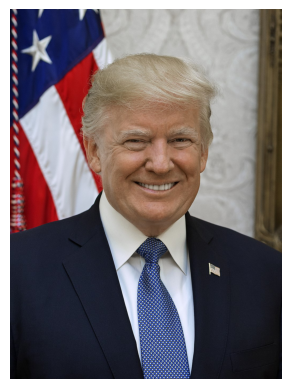

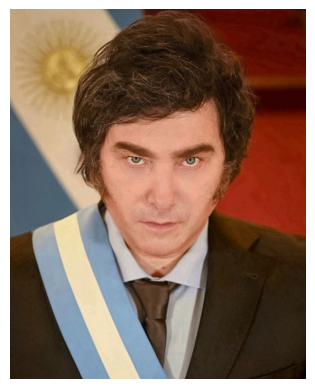

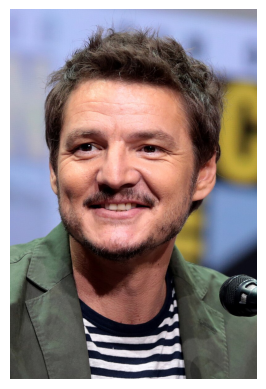

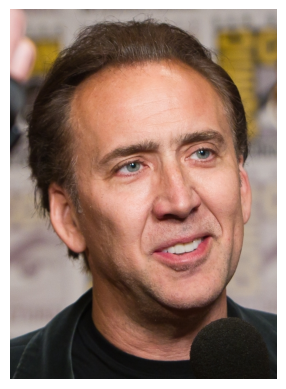

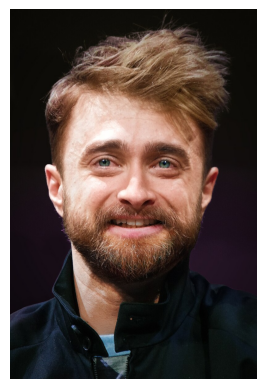

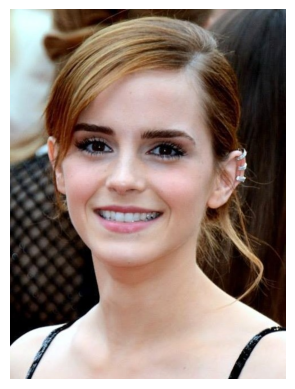

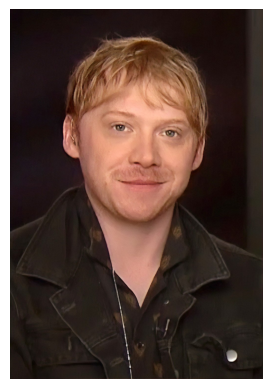

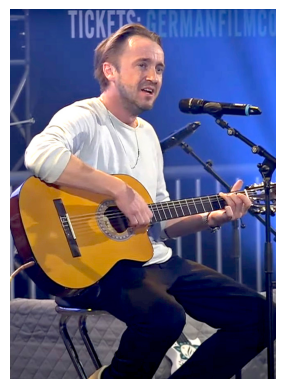

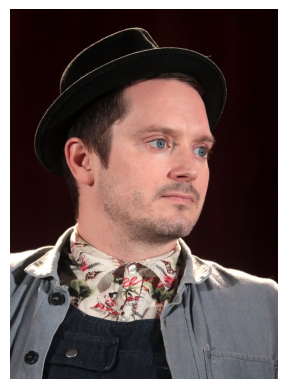

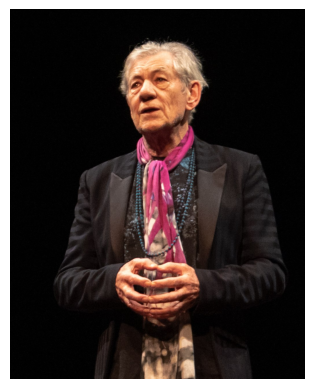

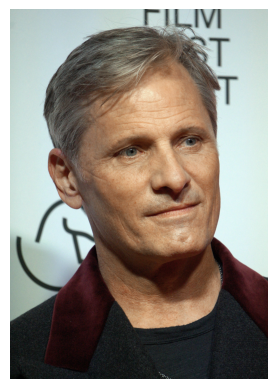

In [4]:
show_image("trump.jpg")
show_image("javier.jpg")
show_image("pascal.jpg")
show_image("cage.jpg")
show_image("theboywholived.jpg")
show_image("watson.jpg")
show_image("grint.jpg")
show_image("felton.jpg")
show_image("wood.jpg")
show_image("mckellen.jpg")
show_image("mortensen.jpg")

скачиваем и распаковываем модель (если ее еще нет на диске)

In [5]:
import os

if not os.path.exists("shape_predictor_68_face_landmarks.dat"): #проверяем наличие
    !wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2 #качаем
    !bzip2 -dk shape_predictor_68_face_landmarks.dat.bz2 #разархивируем

запускаем предиктор точек и детектор лиц

In [6]:
import dlib

predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
detector = dlib.get_frontal_face_detector()


находим лица и рисуем на них bbox и поинты

In [7]:
def detect_and_draw_landmarks(filename):
    img_bgr = cv2.imread(filename)  #читаем фото
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)  #меняем BGR на RGB

    faces = detector(img_rgb)  #передаем сконвертированное фото в детектор

    plt.figure(figsize=(10, 10))  #создаем большой холст
    plt.imshow(img_rgb)  #показываем изображение

    #находим лица
    for face in faces:
        #получаем координаты прямоугольника
        x1, y1, x2, y2 = face.left(), face.top(), face.right(), face.bottom()

        #рисуем прямоугольник
        plt.gca().add_patch(
            plt.Rectangle(
                (x1, y1),
                x2 - x1,
                y2 - y1,
                edgecolor='red',
                facecolor='none',
                linewidth=2
            )
        )

        #предсказываем ключевые точки для этого лица
        landmarks = predictor(img_rgb, face)

        #рисуем 68 точек
        for n in range(68):
            x = landmarks.part(n).x
            y = landmarks.part(n).y
            plt.plot(x, y, marker='o', markersize=2, color='lime')

    plt.axis("off")  #убираем оси
    plt.show()       #показываем результат

применяем для 6 первых фото

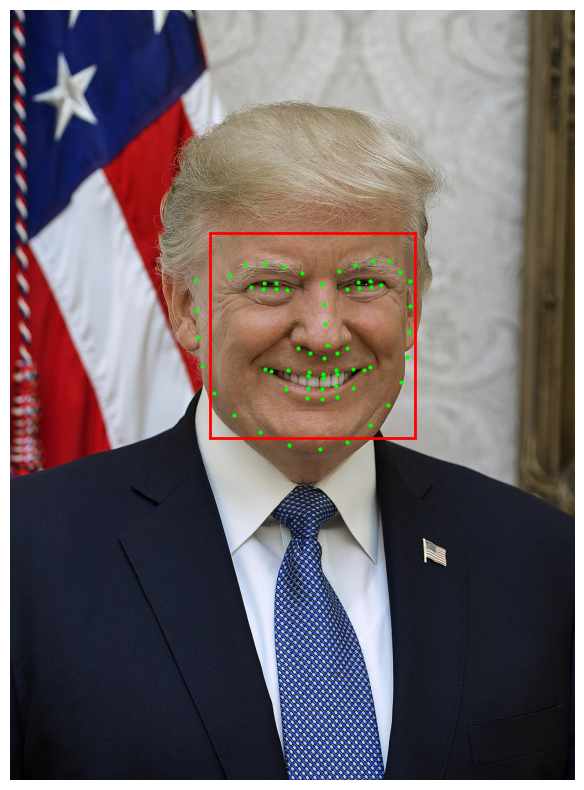

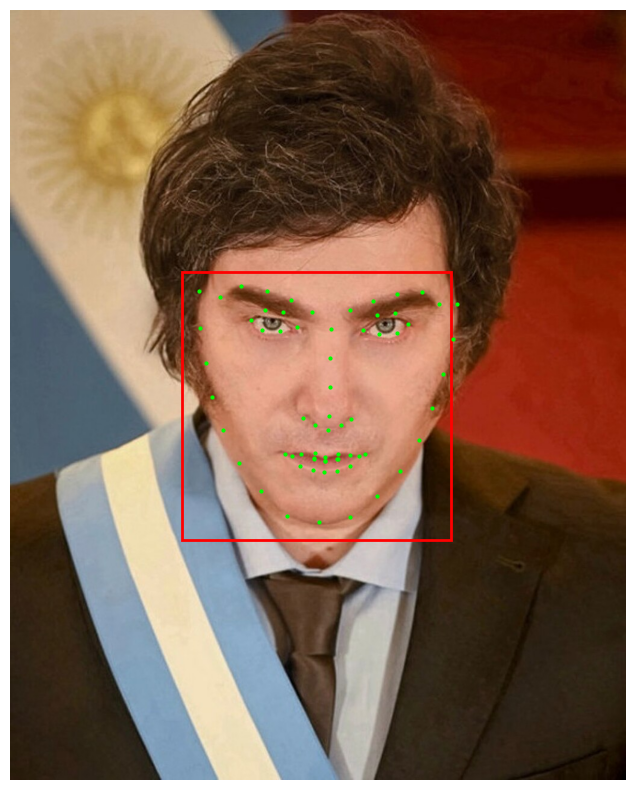

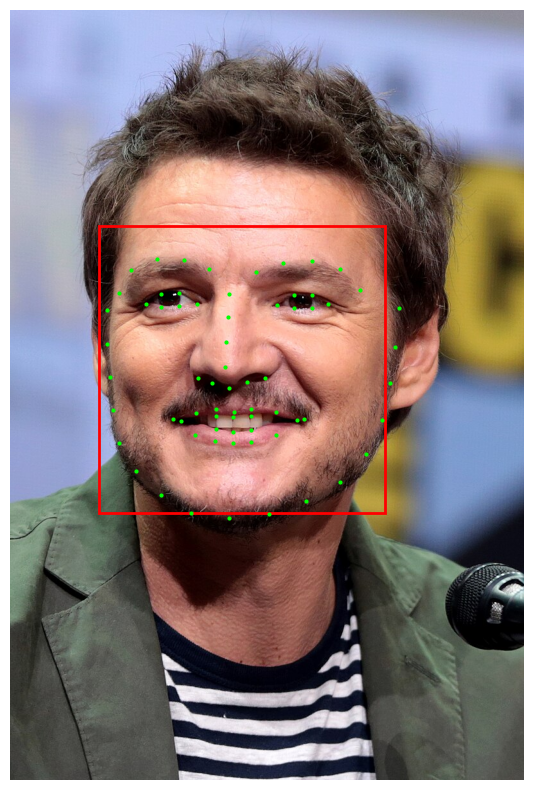

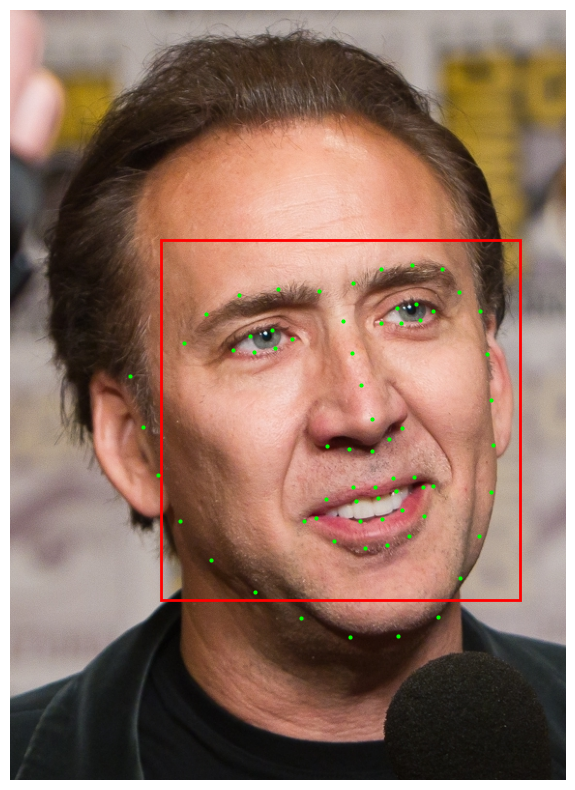

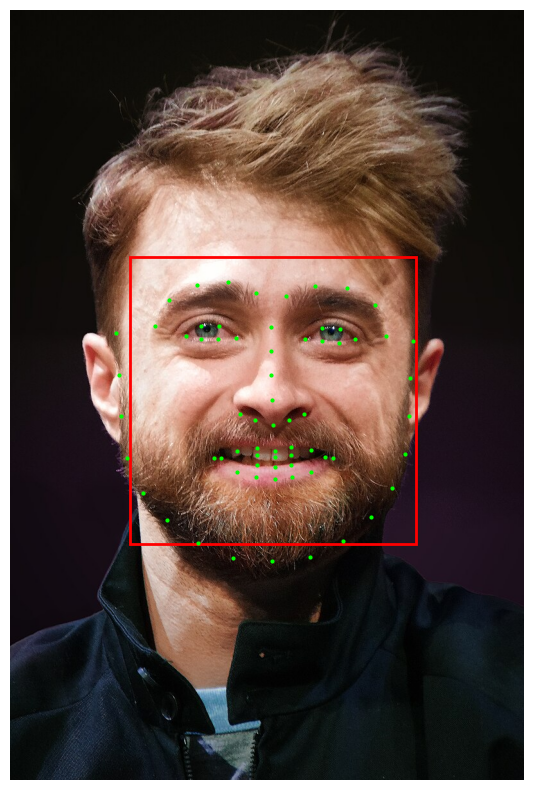

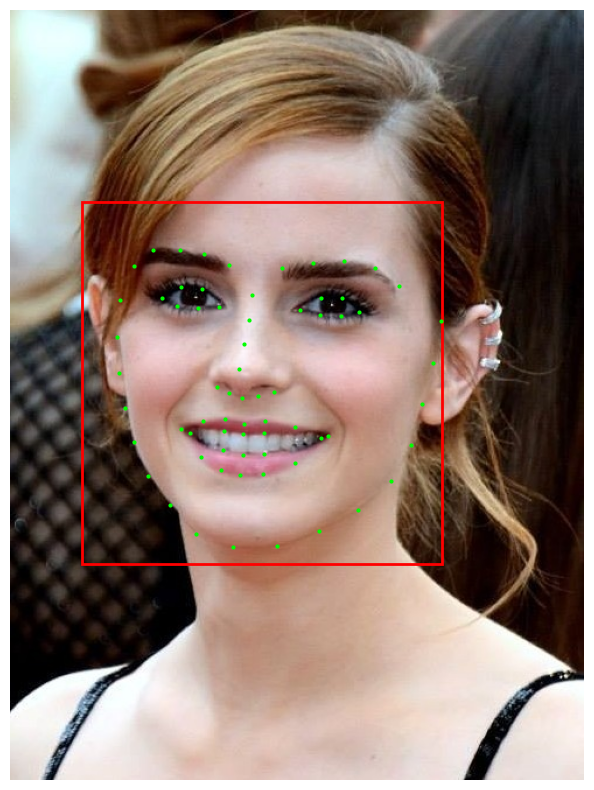

In [8]:
detect_and_draw_landmarks("trump.jpg")
detect_and_draw_landmarks("javier.jpg")
detect_and_draw_landmarks("pascal.jpg")
detect_and_draw_landmarks("cage.jpg")
detect_and_draw_landmarks("theboywholived.jpg")
detect_and_draw_landmarks("watson.jpg")

# ✌ Задача 2


качаем датасет

In [9]:
!wget https://github.com/team5ht/onecell_test/raw/main/training.zip

--2025-04-03 15:50:30--  https://github.com/team5ht/onecell_test/raw/main/training.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/team5ht/onecell_test/main/training.zip [following]
--2025-04-03 15:50:30--  https://raw.githubusercontent.com/team5ht/onecell_test/main/training.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63023793 (60M) [application/zip]
Saving to: ‘training.zip.2’

training.zip.2      100%[===================>]  60.10M   115MB/s    in 0.5s    

2025-04-03 15:50:31 (115 MB/s) - ‘training.zip.2’ saved [63023793/63023793]



распаковываем

In [10]:
import os
import zipfile

if not os.path.exists("training.csv"):
    with zipfile.ZipFile("training.zip", "r") as zip_ref:
        zip_ref.extractall(".")

print("training.csv распакован:", os.path.exists("training.csv")) #проверяем

training.csv распакован: True


передаем данные из датасета

In [11]:
import pandas as pd

df = pd.read_csv("training.csv")

делаем картинку из строки

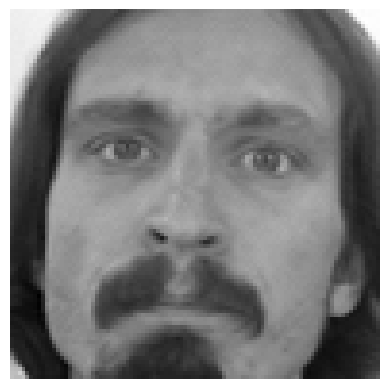

In [12]:
import numpy as np
import matplotlib.pyplot as plt

#берем первую строку
img_str = df.loc[0, "Image"]

#превращаем строку в массив
img_array = np.fromstring(img_str, sep=' ', dtype=np.float32)

#меняем форму массива: 9216 → 96 x 96
img_array = img_array.reshape(96, 96)

#показываем картинку
plt.imshow(img_array, cmap='gray')
plt.axis("off")
plt.show()

сохраняем картинку в файл

In [13]:
import cv2

#преобразуем 96x96 float32 в uint8
img_for_dlib = (img_array).astype(np.uint8)

#сохраняем в PNG
cv2.imwrite("face_0.png", img_for_dlib)


True

импортируем и загружаем модель

In [14]:
import cv2
import dlib
import matplotlib.pyplot as plt

#Загружаем
predictor_path = "shape_predictor_68_face_landmarks.dat"
predictor = dlib.shape_predictor(predictor_path)
detector = dlib.get_frontal_face_detector()

читаем картинку и ищем лицо

In [15]:
img = cv2.imread("face_0.png")  #читаем изображение
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  #переводим в ч/б

faces = detector(gray)  #ищем лицо

#проверяем на пустоту
if len(faces) == 0:
    print("лицо не найдено")
    landmarks = None
else:
    print(f"Найдено лиц: {len(faces)}") #выводим сколько нашли
    face = faces[0]  #берем первое
    landmarks = predictor(gray, face)  #предсказываем точки


Найдено лиц: 1


предсказываем на нем точки с индексами, туда же отрисовываем разметку из датасета

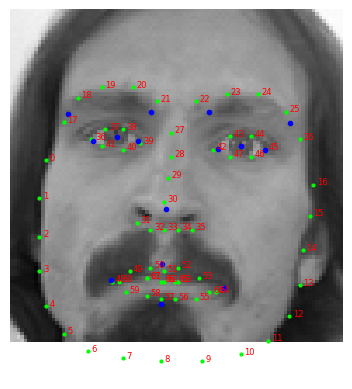

In [16]:
#отрисовываем изображение
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")

#dlib точки (зеленые) + индексы (красные)
for i in range(68):
    x = landmarks.part(i).x
    y = landmarks.part(i).y
    plt.plot(x, y, marker='o', markersize=2, color='lime')
    plt.text(x + 1, y, str(i), fontsize=6, color='red')

#ручная разметка (синие)
gt_names = [
    "left_eye_center", "right_eye_center",
    "left_eye_inner_corner", "left_eye_outer_corner",
    "right_eye_inner_corner", "right_eye_outer_corner",
    "left_eyebrow_inner_end", "left_eyebrow_outer_end",
    "right_eyebrow_inner_end", "right_eyebrow_outer_end",
    "nose_tip",
    "mouth_center_top_lip", "mouth_left_corner",
    "mouth_right_corner", "mouth_center_bottom_lip"
]

for name in gt_names:
    x = df.loc[0, name + "_x"]
    y = df.loc[0, name + "_y"]
    if not pd.isna(x) and not pd.isna(y):
        plt.plot(x, y, 'o', color='blue', markersize=3)

plt.show()


**Как определил метрику.**

Сначала думал считать расстояние между размеченными точками и ближайшими к ним длибовскими, но тогда на отдельных фото могло бы возвращаться минимальное расстояние до ошибочной точки и это испортило бы данные (теоретически можно было бы предположить что чаще точки все таки были бы верным, проанализировать частоту соответствий и взять самые частые соответствия за референс, а остальные пометить как ошибочные. Но это все равно потребовало бы ручной валидации и показалось усложнением, когда мы заранее знаем анатомический смысл точек).

Оказалось dlib выдает фиксированные порядок точек и значит можно сопоставить каждую размеченную точку из датасета с конкретной точкой из dlib (с конкретным индексом) и получить сразу конкретное соответствие, а не просто ближайшие по координатам точки. И получается, что метрикой будет расстояние (ошибка/погрешность) между конкретными точками из dlib и размеченными точками из датасета. Сооветственно, при условии, что dlib вегда предсказывает точки в фиксированном порядке, а в датасете каждая точка также фиксирована для конкретной области лица (очевидно), то можно взять небольшую выборку, разметить соответствия вручную, результат записать в словарь и уже через него прогнать весь остальной датасет. Т.к. задание тестовое, я взял в выборку одну фотографию и упомянул в комменте об условности размера выборки. В боевых условиях я бы перестраховался каким-нибудь разумным числом.


---








сравниваем глазками соответствие предсказанных точек и разметки по этому фото (в реальной бизнесовой задаче выборка видимо должна быть больше одного фото). составляем словарь с результатами

In [17]:
kaggle_to_dlib = {
    "left_eye_center": 38,
    "right_eye_center": 47,
    "left_eye_inner_corner": 39,
    "left_eye_outer_corner": 36,
    "right_eye_inner_corner": 42,
    "right_eye_outer_corner": 45,
    "left_eyebrow_inner_end": 21,
    "left_eyebrow_outer_end": 17,
    "right_eyebrow_inner_end": 22,
    "right_eyebrow_outer_end": 25,
    "nose_tip": 30,
    "mouth_center_top_lip": 51,
    "mouth_left_corner": 48,
    "mouth_right_corner": 54,
    "mouth_center_bottom_lip": 57
}

считаем метрику

In [18]:
import numpy as np

#словарь: точка-ошибка (в пикселях)
errors = {}

#берем разметку и предсказания для строки 0
i = 0  #индекс строки
row = df.loc[i] #вся строка

#получаем координаты точек dlib
face = faces[0]
landmarks = predictor(gray, face)

#проходимся по всем соответствиям
for name, dlib_idx in kaggle_to_dlib.items():
    gt_x = row[name + "_x"]
    gt_y = row[name + "_y"]

    #пропускаем, если в разметке нет координат
    if pd.isna(gt_x) or pd.isna(gt_y):
        continue

    #берем предсказанные точки
    pred_x = landmarks.part(dlib_idx).x
    pred_y = landmarks.part(dlib_idx).y

    #пычисляем расстояние (смещение) по прямой, передаем в переменную
    dist = np.sqrt((gt_x - pred_x) ** 2 + (gt_y - pred_y) ** 2)

    #записываем значение в словарь
    errors[name] = dist

#выводим расстояние по каждой точке
for k, v in errors.items():
    print(f"{k:30} - {v:.2f} px")

#среднее расстояние по всем точкам
mean_error = np.mean(list(errors.values()))
print(f"\nСреднее смещение по изображению: {mean_error:.2f} px")


left_eye_center                - 34.40 px
right_eye_center               - 33.24 px
left_eye_inner_corner          - 22.64 px
left_eye_outer_corner          - 50.22 px
right_eye_inner_corner         - 21.80 px
right_eye_outer_corner         - 49.62 px
left_eyebrow_inner_end         - 15.26 px
left_eyebrow_outer_end         - 65.23 px
right_eyebrow_inner_end        - 13.12 px
right_eyebrow_outer_end        - 62.65 px
nose_tip                       - 2.11 px
mouth_center_top_lip           - 2.18 px
mouth_left_corner              - 32.26 px
mouth_right_corner             - 30.60 px
mouth_center_bottom_lip        - 1.49 px

Среднее смещение по изображению: 29.12 px


теперь применяем ко всему датасету, предварительно сохраняем фото

In [19]:
for i in range(len(df)):
    row = df.loc[i]

    #преобразуем строку пикселей в массив
    img_array = np.fromstring(row["Image"], sep=" ", dtype=np.float32).reshape(96, 96)

    #преобразуем к формату изображений
    img_uint8 = img_array.astype(np.uint8)

    #сохраняем как png
    filename = f"face_{i}.png"
    cv2.imwrite(filename, img_uint8)

    #показываем прогресс
    if i % 500 == 0:
        print(f"Сохранил: {filename}")

print("Все изображения сохранены.")

Сохранил: face_0.png
Сохранил: face_500.png
Сохранил: face_1000.png
Сохранил: face_1500.png
Сохранил: face_2000.png
Сохранил: face_2500.png
Сохранил: face_3000.png
Сохранил: face_3500.png
Сохранил: face_4000.png
Сохранил: face_4500.png
Сохранил: face_5000.png
Сохранил: face_5500.png
Сохранил: face_6000.png
Сохранил: face_6500.png
Сохранил: face_7000.png
Все изображения сохранены.


считаем смещение для всего датасета

In [20]:
all_errors = []  #сюда собираем среднюю ошибку по каждому фото

for i in range(len(df)):  #идём по всем строкам датасета
    row = df.loc[i]  #берём одну строку с разметкой

    #загружаем файл
    img = cv2.imread(f"face_{i}.png")
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    #находим лицо
    faces = detector(gray)
    if len(faces) == 0:
        all_errors.append(None)  # если лицо не найдено - ставим None
        continue

    face = faces[0]
    landmarks = predictor(gray, face)

    #сравниваем точки
    errors = []  #для одного фото

    for name, dlib_idx in kaggle_to_dlib.items():
        gt_x = row[name + "_x"]
        gt_y = row[name + "_y"]

        if pd.isna(gt_x) or pd.isna(gt_y):
            continue  #если разметка пропущена - пропускаем

        pred_x = landmarks.part(dlib_idx).x
        pred_y = landmarks.part(dlib_idx).y

        #считаем расстояние
        dist = np.sqrt((gt_x - pred_x) ** 2 + (gt_y - pred_y) ** 2)
        errors.append(dist)

    #среднее смещение по фото
    if errors:
        mean_error = np.mean(errors)
    else:
        mean_error = None

    all_errors.append(mean_error)

    #показываем прогресс с шагом в 500 фоток
    if i % 500 == 0:
        print(f"{i}: смещение = {mean_error:.2f} px")

print("Посчитали смещение для всех изображений")


0: смещение = 29.12 px
500: смещение = 29.49 px
1000: смещение = 27.72 px
1500: смещение = 30.57 px
2000: смещение = 29.83 px
2500: смещение = 19.31 px
3000: смещение = 18.00 px
3500: смещение = 21.92 px
4000: смещение = 21.18 px
4500: смещение = 22.69 px
5000: смещение = 21.09 px
5500: смещение = 20.22 px
6000: смещение = 21.89 px
6500: смещение = 21.08 px
Посчитали смещение для всех изображений


проверяем сколько получилось

In [21]:
valid_indices = [i for i, e in enumerate(all_errors) if e is not None]
valid_errors = [e for e in all_errors if e is not None]

print(f"всего валидных фото: {len(valid_indices)}")

всего валидных фото: 6538


сортируем и ищем 3 лучших и худших

In [22]:
#сортируем пары (индекс, смещение)
sorted_pairs = sorted(zip(valid_indices, valid_errors), key=lambda x: x[1])

#3 лучших
best = sorted_pairs[:3]

#3 худших
worst = sorted_pairs[-3:]

print("лучшие (наименьшее смещение):")
for i, err in best:
    print(f"  {i}: {err:.2f} px")

print("\nхудшие (наибольшее смещение):")
for i, err in worst:
    print(f"  {i}: {err:.2f} px")


лучшие (наименьшее смещение):
  2982: 10.88 px
  5568: 10.99 px
  2153: 11.91 px

худшие (наибольшее смещение):
  2187: 38.91 px
  810: 39.23 px
  1877: 41.33 px


мощнейше визуализируем

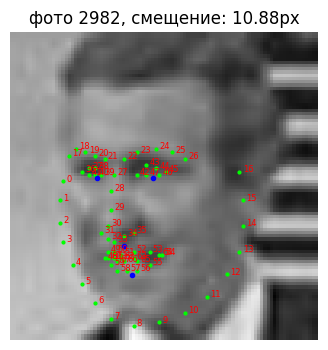

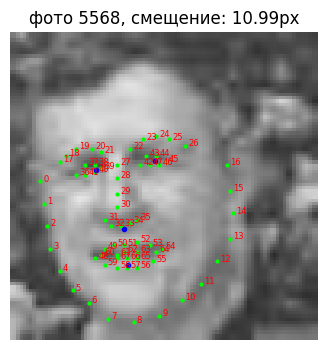

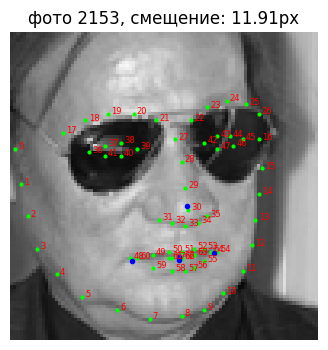

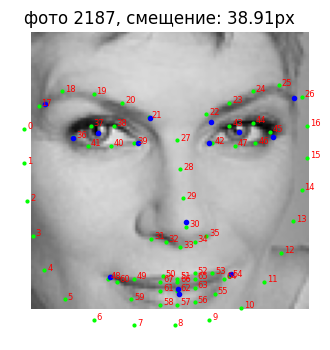

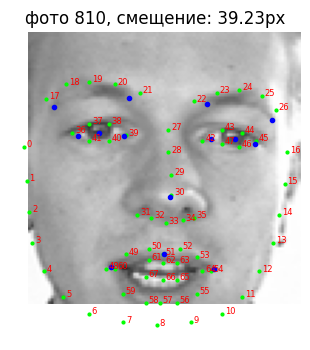

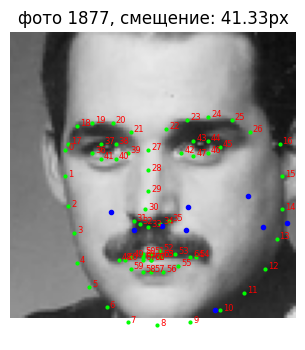

In [23]:
#список размеченных точек по названиям
gt_names = list(kaggle_to_dlib.keys())

#берем лучшие и худшие
to_show = best + worst

for i, err in to_show:
    #загружаем фото
    img = cv2.imread(f"face_{i}.png")
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # грейскейлим его

    #находим лицо и точки
    faces = detector(gray)
    if len(faces) == 0:
        print(f"на фото {i} нет лица")
        continue

    face = faces[0]
    landmarks = predictor(gray, face)

    #рисуем
    plt.figure(figsize=(4, 4))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title(f"фото {i}, смещение: {err:.2f}px")

    #dlib точки (зелёные) + индексы (красные)
    for idx in range(68):
        x = landmarks.part(idx).x
        y = landmarks.part(idx).y
        plt.plot(x, y, marker='o', markersize=2, color='lime')
        plt.text(x + 1, y, str(idx), fontsize=6, color='red')

    #размеченные точки (синие)
    row = df.loc[i]
    for name in gt_names:
        x = row[name + "_x"]
        y = row[name + "_y"]
        if not pd.isna(x) and not pd.isna(y):
            plt.plot(x, y, 'o', color='blue', markersize=3)

    #показываем
    plt.show()

# Мюсли

Похоже, что лучшие соответствия чаще встречаются на фото низкого качества, просто за счет кучности предсказанных точек. То есть получается иллюзия точности предсказания. Возможно в реальных условиях стоит учитывать относительное качество каждого фото при подготовке датасета (чтобы он был более-менее однородный) под ***подобную*** задачу. Или хотя бы потом вручную валидировать лучшие/худшие варианты, чтобы повысить общую валидность метрик. А может быть я фантазирую



---

# 🚀 Задача 3

устанавливаем библиотеку (при установке колаб может ругаться и просить себя перезапустить из-за устаревших зависимостей, которые supervisely тащит за собой. Как я понял это ок и после перезагрузки все работает)

In [24]:
!pip install supervisely

подключаемся к supervisely

In [25]:
import supervisely as sly
from getpass import getpass

#получаем токен
api_token = getpass("токен supervisely:")

#подключаемся
api = sly.Api("https://app.supervisely.com", api_token)

#проверяем авторизацию
user_info = api.user.get_my_info()
print(f"Подключено как: {user_info.login}")

токен supervisely:··········
Подключено как: berebisov


получаем workspace id из project id

In [26]:
project_id = 341239

project_info = api.project.get_info_by_id(project_id)

# Извлекаем workspace_id
workspace_id = project_info.workspace_id
print(f"Project: {project_info.name}")
print(f"Workspace id: {workspace_id}")

Project: Face keypoints correction
Workspace id: 120791


ищем в датасете первые 10 фото

In [27]:
import os

#составляем список файлов
image_paths = [f"face_{i}.png" for i in range(10)]

#проверим, что они существуют
for path in image_paths:
    if os.path.exists(path):
        print(f"Найден файл: {path}")
    else:
        print(f"Не найден файл: {path}")


Найден файл: face_0.png
Найден файл: face_1.png
Найден файл: face_2.png
Найден файл: face_3.png
Найден файл: face_4.png
Найден файл: face_5.png
Найден файл: face_6.png
Найден файл: face_7.png
Найден файл: face_8.png
Найден файл: face_9.png


ищем лица и точки

In [28]:
import cv2
import dlib

#загружаем модели
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

#сюда положим результат
landmark_results = []

#проходим по всем изображениям
for path in image_paths:
    img = cv2.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    faces = detector(gray)

    if len(faces) == 0:
        print(f"Лицо не найдено: {path}")
        continue

    face = faces[0]
    landmarks = predictor(gray, face)

    #сохраняем 68 точек в список
    points = []
    for i in range(68):
        x = landmarks.part(i).x
        y = landmarks.part(i).y
        points.append([x, y])

    landmark_results.append({
        "image": path,
        "points": points
    })

    print(f"Обработано: {path}, точек: {len(points)}")


Обработано: face_0.png, точек: 68
Обработано: face_1.png, точек: 68
Обработано: face_2.png, точек: 68
Обработано: face_3.png, точек: 68
Обработано: face_4.png, точек: 68
Обработано: face_5.png, точек: 68
Обработано: face_6.png, точек: 68
Обработано: face_7.png, точек: 68
Обработано: face_8.png, точек: 68
Обработано: face_9.png, точек: 68


создаем датасет

In [29]:
dataset_name = "from-task-3"

#используем project_info
dataset = api.dataset.create(project_info.id, dataset_name, change_name_if_conflict=True)

print(f"Датасет создан: {dataset.name} (id = {dataset.id})")


Датасет создан: from-task-3_002 (id = 1034896)


загружаем туда фото

In [30]:
from supervisely.io.fs import get_file_name_with_ext

#по каждому файлу
for path in image_paths:
    img_name = get_file_name_with_ext(path)

    #загружаем в Supervisely
    img_info = api.image.upload_path(dataset.id, img_name, path)

    #проверяем и получаем айдишники
    print(f"загружено изображение: {img_name}, ID: {img_info.id}")


загружено изображение: face_0.png, ID: 352269053
загружено изображение: face_1.png, ID: 352269054
загружено изображение: face_2.png, ID: 352269055
загружено изображение: face_3.png, ID: 352269056
загружено изображение: face_4.png, ID: 352269057
загружено изображение: face_5.png, ID: 352269058
загружено изображение: face_6.png, ID: 352269059
загружено изображение: face_7.png, ID: 352269060
загружено изображение: face_8.png, ID: 352269061
загружено изображение: face_9.png, ID: 352269062


костылим landmark задним числом

In [31]:
#проверяем наличие
meta = api.project.get_meta(project_info.id)
meta_json = sly.ProjectMeta.from_json(meta)

if not any(obj_class.name == "landmark" for obj_class in meta_json.obj_classes):
    print("класс landmark не найден. Создаем.")

    #создаем класс точки
    landmark_class = sly.ObjClass(name="landmark", geometry_type=sly.Point)

    #добавляем его в мету проекта
    new_meta = meta_json.add_obj_class(landmark_class)

    #обновляем мету на сервере
    api.project.update_meta(project_info.id, new_meta.to_json())
    print("класс landmark создан и добавлен.")
else:
    print("класс landmark уже есть в проекте.")


класс landmark уже есть в проекте.


делаем аннотацию (добавляем точки)

In [32]:
from supervisely.io.json import dump_json_file
import cv2
import os

for item in landmark_results:
    image_name = item["image"]
    points = item["points"]

    #ищем изображение в датасете по имени
    img_info = api.image.get_info_by_name(dataset.id, image_name)
    if img_info is None:
        print(f"Не найдено в supervisely: {image_name}")
        continue

    #читаем изображение, чтобы узнать его размер
    img = cv2.imread(image_name)
    height, width = img.shape[:2]

    #готовим список объектов-точек
    objects = []
    for point in points:
        x, y = point
        #ограничиваем координаты внутри картинки (иначе ловили ошибку, когда точка вне изображения)
        x = max(0, min(x, width - 1))
        y = max(0, min(y, height - 1))

        objects.append({
            "description": "",
            "geometryType": "point",
            "classTitle": "landmark",
            "points": {
                "exterior": [[x, y]],
                "interior": []
            }
        })


    #собираем аннотацию
    ann_data = {
        "description": "",
        "size": {"height": height, "width": width},
        "objects": objects
    }

    #временно сохраняем JSON
    ann_path = f"/tmp/{image_name}_ann.json"
    dump_json_file(ann_data, ann_path)

    #загружаем аннотацию
    api.annotation.upload_path(img_info.id, ann_path)

    print(f"Аннотация загружена: {image_name}")


Аннотация загружена: face_0.png
Аннотация загружена: face_1.png
Аннотация загружена: face_2.png
Аннотация загружена: face_3.png
Аннотация загружена: face_4.png
Аннотация загружена: face_5.png
Аннотация загружена: face_6.png
Аннотация загружена: face_7.png
Аннотация загружена: face_8.png
Аннотация загружена: face_9.png


### скрин результата

![Предпросмотр supervisely](https://github.com/team5ht/onecell_test/blob/main/screenshot.png?raw=true)


## Аглоритм доразметки

*Как я понял задачу - нужно что-то вроде инструкции для разметчика:*

Необходимо доразметить (поправить автоматически расставленные) ключевые точки на лицах в датасете from-task-3.

1. Модель автоматически размечает 68 ключевых точек в строго определенном порядке, например точки с номерами 17-21 всегда размечают левую бровь, 22-26 - правую бровь и т.д. Полную визуальную схему разметки можно найти в интернете или ниже.
2. Открываем визуальную схему разметки, например [вот эту](https://ibug.doc.ic.ac.uk/resources/facial-point-annotations/)
3. Открываем любое изображение в датасете, сравниваем фактическое положение размеченных в изображении точек с образцом (схемой). Внимательно следим, чтобы конкретные номера точек на изображении соответствовали номерам в образце.
4. Если положение точки соответствует схеме - оставляем ее.
5. Если точка смещена относительно правильного положения - перетаскиваем ее так, чтобы она соответствовала схеме.
6. Если точка отсутствует - добавляем точку вручную.
7. Если присутствует лишняя точка - удаляем.

Таким образом необходимо проверить и поправить все 68 автоматически расставленных точек на каждом изображении датасета, включая:
- контур лица (точки 0–16)  
- левая бровь (точки 17–21)  
- правая бровь (точки 22–26)  
- нос (точки 27–35)  
- левый глаз (точки 36–41)  
- правый глаз (точки 42–47)  
- внешний контур губ (точки 48–59)  
- внутренний контур губ (точки 60–67)

Результат доразметки должен точно соответствовать схеме (номера строго на своих местах) и максимально соответствовать анатомическим чертам лица на изображении.

## Замеры времени.
*Учитывая, что я никогда не размечал лица, не видел валидированных референсов для конкретно этой разметки и не работал в Supervisely, я замерял время для второй попытки разметки с нуля для одного и того же лица, первую тренировочную - не замерял как совсем не показательную. Для боевого замера нужно разметить/доразметить хотя бы 10-20 изображений.*

**Полностью ручная разметка лица с нуля: ~5-6 минут**

**Доразметка лица за моделью (исправление точек): около 3х минут**